In [1]:
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from pandas import read_csv
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import random
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

from matplotlib import pyplot

In [2]:
###### Loading datasets ########

# Load train dataset
#train_url = '/Users/agrawalp4/Documents/Varun_work/ml/category_75nM/promoters/k27ac/full_data.csv'
#train_url = '/Users/agrawalp4/Documents/Varun_work/ml/cellline_RH4/ml/up_down/svm/full_rh4_data.csv'
total_train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_test.csv"
total_train_genes = read_csv("/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_test_gene_list.csv",
                      header=0, index_col=False)

#train_url = '/Users/agrawalp4/Downloads/train.csv'
total_dataframe_train = read_csv(total_train_url, header=0, index_col=False)
total_data_train = total_dataframe_train.values
total_X_train, total_y_train = total_data_train[:, :-1], total_data_train[0:, -1]

# Load test dataset
#test_url = '/Users/agrawalp4/Documents/Varun_work/ml/HBEC/prom_tss.csv'
total_test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_train.csv"
total_test_genes = read_csv("/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_train_gene_list.csv",
                      header=0, index_col=False)
total_dataframe_test = read_csv(total_test_url, header=0, index_col=False)
total_data_test = total_dataframe_test.values
total_X_test, total_y_test = total_data_test[:, :-1], total_data_test[0:, -1]

Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950322
roc_auc on test data : 0.568532
                                  
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950322
roc_auc on test data : 0.570013
                                  
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950322
roc_auc on test data : 0.575144
                                  
Average precision score: 0.20
Average recall score: 0.01
f1 on test data : 0.027586
Accuray on test data : 0.949607
roc_auc on test data : 0.572222
                                  
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950322
roc_auc on test data : 0.576494
                                  


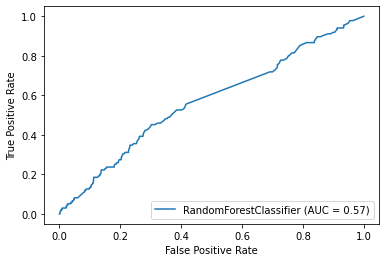

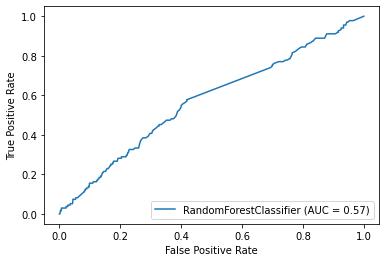

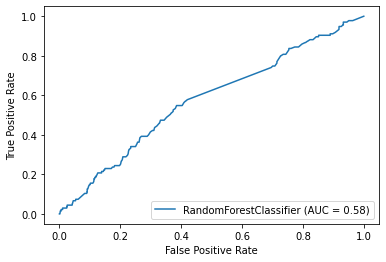

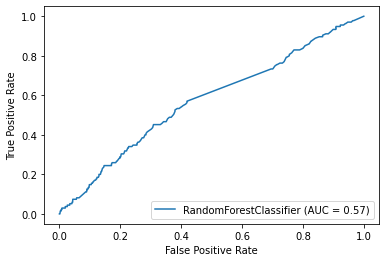

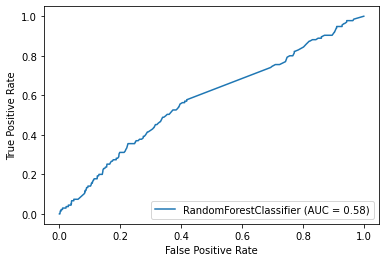

In [3]:
####### Random Forest Classifier ####
import random
from sklearn.ensemble import RandomForestClassifier


# Load test dataset
test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_test.csv"
dataframe_test = read_csv(test_url, header=0)
data_test = dataframe_test.values
X_test, y_test = data_test[:, :-1], data_test[0:, -1]


for i in range(5):
    # Load train dataset
    train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_train.csv"
    dataframe_train = read_csv(train_url, header=0)
    dataframe_train = dataframe_train.sample(n=4477, random_state=1)
    data_train = dataframe_train.values
    X_train, y_train = data_train[:, :-1], data_train[0:, -1]

    clf = RandomForestClassifier(n_estimators=1000)
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict_proba(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res_f1 = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res_f1)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred1[:,1])
    print("roc_auc on test data : %f" % score_res)

    plot_roc_curve(clf, X_test, y_test)
    clf
    
    print("                                  ")

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'downregulated.regen_Fraction_sp_less5'),
  Text(2, 0, 'downregulated.stress_Fraction_sp_less5'),
  Text(3, 0, 'downregulated.wound_Fraction_sp_less5'),
  Text(4, 0, 'msigdb.regen_Fraction_sp_less5'),
  Text(5, 0, 'msigdb.stress_Fraction_sp_less5'),
  Text(6, 0, 'msigdb.wound_Fraction_sp_less5'),
  Text(7, 0, 'upregulated.regen_Fraction_sp_less5'),
  Text(8, 0, 'upregulated.stress_Fraction_sp_less5'),
  Text(9, 0, 'upregulated.wound_Fraction_sp_less5'),
  Text(10, 0, 'label')])

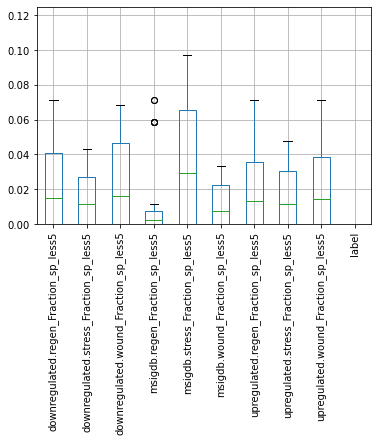

In [3]:
df = total_dataframe_train.loc[:, total_dataframe_train.columns != 'degree']

df.boxplot()

plt.ylim(0, 0.125) 
plt.xticks(rotation=90)

Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951662
roc_auc on test data : 0.462213


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


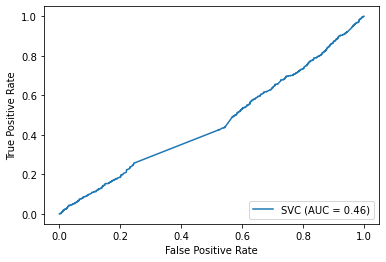

In [4]:
####### Support Vector Classifier ####

clf = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
clf.fit(total_X_train, total_y_train)
np.random.seed(786)

# make a prediction
y_pred = clf.predict(total_X_test)
y_pred1 = clf.predict_proba(total_X_test)
# summarize prediction

average_precision = precision_score(total_y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(total_y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(total_y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(total_y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(total_y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, total_X_test, total_y_test)

#r2_score_res = r2_score(y_test, y_pred)
#print("r^2 on test data : %f" % r2_score_res)

In [5]:
def svc_model(X_train, y_train, X_test, y_test):
    clf = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
    clf.fit(X_train, y_train)
    np.random.seed(786)

    # make a prediction
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict_proba(X_test)
    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred1[:,1])
    print("roc_auc on test data : %f" % score_res)
    
    return(clf)

def random_forest_model(X_train, y_train, X_test, y_test):
    np.random.seed(786)

    clf = RandomForestClassifier(n_estimators=1000)
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict_proba(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred1[:,1])
    print("roc_auc on test data : %f" % score_res)
    
    return(clf)

def ada_boost_model(X_train, y_train, X_test, y_test):

    clf = AdaBoostClassifier(n_estimators=10)
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict_proba(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred1[:,1])
    print("roc_auc on test data : %f" % score_res)
    return(clf)

def gradient_boost_model(X_train, y_train, X_test, y_test):
    clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=1, random_state=0)
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict_proba(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred1[:,1])
    print("roc_auc on test data : %f" % score_res)
    return(clf)
    
def logistic_regression_model(X_train, y_train, X_test, y_test):
    clf = LogisticRegression(penalty='l1', C=1.0, class_weight=None, solver='liblinear')
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred)
    print("roc_auc on test data : %f" % score_res)
    return(clf)

def extra_trees_model(X_train, y_train, X_test, y_test):
    clf = ExtraTreesClassifier(n_estimators=100, random_state=2)
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred)
    print("roc_auc on test data : %f" % score_res)
    return(clf)


0
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951036
roc_auc on test data : 0.502110
1
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951036
roc_auc on test data : 0.532178
2
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.466612
3
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.475191
4
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.471304
5
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.516548
6
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950679
roc_auc on test data : 0.503620
7
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950679
roc_auc on test data : 0.505242
8
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951394
roc_auc on test data : 0.527874
9
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.548222


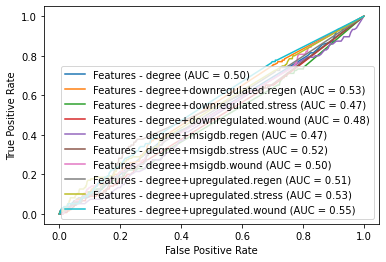

In [6]:
ax = plt.gca()
for feat in range(0,len(total_dataframe_train.columns)-1):
    print(feat)
    
    
    # Load train dataset
    train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_train.csv"
    dataframe_train = read_csv(train_url, header=0)
    data_train = dataframe_train.values
    X_train, y_train = data_train[:, [feat]], data_train[0:, -1]

    # Load test dataset
    test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_test.csv"
    dataframe_test = read_csv(test_url, header=0)
    data_test = dataframe_test.values
    X_test, y_test = data_test[:, [feat]], data_test[0:, -1]
    
    print("####### Random Forest Classifier ####")
    rf_clf = random_forest_model(X_train, y_train, X_test, y_test)

    
    if feat == 0:
        curve_name = "Features - " + dataframe_train.columns[feat]
        plot_roc_curve(rf_clf, X_test, y_test, name = curve_name, ax = ax)
    else:
        curve_name = "Features - degree+" + dataframe_train.columns[feat][:-18]
        plot_roc_curve(rf_clf, X_test, y_test, name = curve_name, ax=ax)
    

In [7]:
cols = total_dataframe_train.columns.tolist()
cols = [cols[0],cols[2],cols[1],cols[8],cols[5],cols[3],cols[6],cols[7],cols[9],cols[4], "label"]

In [8]:
feat = 8
train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_train.csv"
dataframe_train = read_csv(train_url, header=0)
dataframe_train = dataframe_train[cols]
data_train = dataframe_train.values
X_train, y_train = data_train[:, :-feat], data_train[0:, -1]
X_train

array([[6.00000000e+00, 1.32498193e-03, 4.57721031e-03],
       [2.30000000e+01, 3.24018309e-02, 4.76993496e-02],
       [2.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.00000000e+00, 2.63791857e-02, 4.10744399e-02],
       [4.40000000e+01, 2.39701277e-02, 2.87882438e-02]])

In [9]:
feat = 5
train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_train.csv"
dataframe_train = read_csv(train_url, header=0)
dataframe_train = dataframe_train[cols]
data_train = dataframe_train.values
X_train, y_train = data_train[:, :-feat], data_train[0:, -1]
X_train

array([[6.00000000e+00, 1.32498193e-03, 4.57721031e-03, 1.32498193e-03,
        2.40905806e-03, 3.01132257e-03],
       [2.30000000e+01, 3.24018309e-02, 4.76993496e-02, 3.40881715e-02,
        7.10672127e-02, 5.38424476e-02],
       [2.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [2.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [6.00000000e+00, 2.63791857e-02, 4.10744399e-02, 2.80655264e-02,
        5.85401108e-02, 4.67357263e-02],
       [4.40000000e+01, 2.39701277e-02, 2.87882438e-02, 2.43314864e-02,
        5.64924115e-02, 2.98723199e-02]])

1
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.478735
####### Random Forest Classifier ####
Average precision score: 0.09
Average recall score: 0.01
f1 on test data : 0.013699
Accuray on test data : 0.948535
roc_auc on test data : 0.559351
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.582028
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.575889
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####
Average precision score: 0.08
Average recall score: 0.01
f1 on test data : 0.013514
Accuray on test data : 0.947820
roc_auc on test data : 0.501451
2
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.539937
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.948535
roc_auc on test data : 0.554613
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.587640
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.567288
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####
Average precision score: 0.07
Average recall score: 0.01
f1 on test data : 0.013423
Accuray on test data : 0.947462
roc_auc on test data : 0.501263
3
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.482347
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.948535
roc_auc on test data : 0.553447
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.584761
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.572528
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####
Average precision score: 0.09
Average recall score: 0.01
f1 on test data : 0.013699
Accuray on test data : 0.948535
roc_auc on test data : 0.501826
4
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.536365
####### Random Forest Classifier ####
Average precision score: 0.25
Average recall score: 0.01
f1 on test data : 0.014388
Accuray on test data : 0.951036
roc_auc on test data : 0.527535
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.561327
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.577534
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.25
Average recall score: 0.01
f1 on test data : 0.014388
Accuray on test data : 0.951036
roc_auc on test data : 0.503140
5
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.470254
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950322
roc_auc on test data : 0.485209
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.541531
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.540350
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####
Average precision score: 0.11
Average recall score: 0.01
f1 on test data : 0.013889
Accuray on test data : 0.949249
roc_auc on test data : 0.502202
6
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.473763
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950322
roc_auc on test data : 0.510737
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.519717
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.541323
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.948892
roc_auc on test data : 0.498498
7
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.497238
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950322
roc_auc on test data : 0.503395
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.534201
####### Gradient Boost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.531119
####### Logistic_regression Classifier ####
Average precision score: 0.00


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.948177
roc_auc on test data : 0.498122
8
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.479477
####### Random Forest Classifier ####
Average precision score: 0.17
Average recall score: 0.01
f1 on test data : 0.014184
Accuray on test data : 0.950322
roc_auc on test data : 0.507421
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.486117
####### Gradient Boost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.525626
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.08
Average recall score: 0.01
f1 on test data : 0.013514
Accuray on test data : 0.947820
roc_auc on test data : 0.501451
9
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.480131
####### Random Forest Classifier ####
Average precision score: 0.05
Average recall score: 0.01
f1 on test data : 0.012987
Accuray on test data : 0.945675
roc_auc on test data : 0.499324
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.509716
####### Gradient Boost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.524592
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.03
Average recall score: 0.01
f1 on test data : 0.011976
Accuray on test data : 0.941029
roc_auc on test data : 0.497883
10
####### Support Vector Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.481854
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951036
roc_auc on test data : 0.498950
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.502136
####### Gradient Boost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.523340
####### Logistic_regression Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951751
roc_auc on test data : 0.500000
####### Extra Trees Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.950322
roc_auc on test data : 0.499249


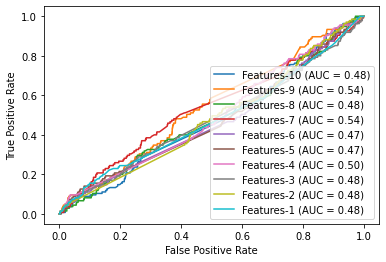

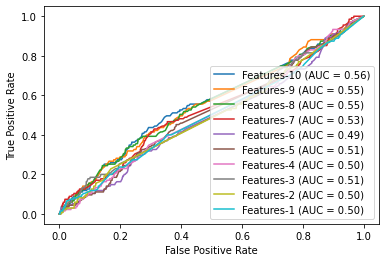

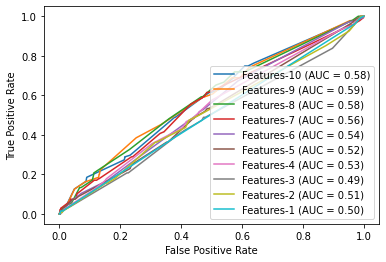

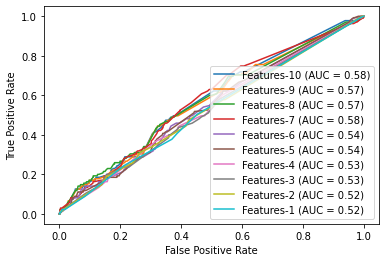

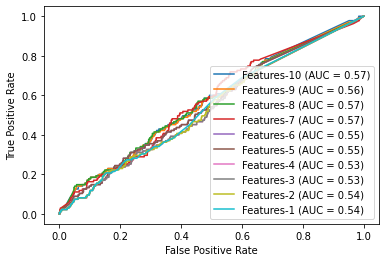

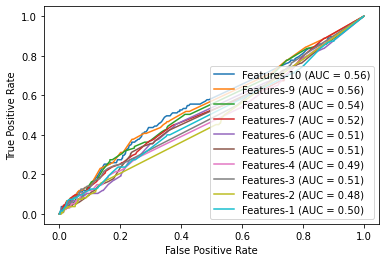

In [11]:
svm_plt_list = []
rf_plt_list = []
ada_boost_plt_list = []
gradient_boost_plt_list = []
log_reg_plt_list = []
extra_trees_plt_list = []
for feat in range(1,len(total_dataframe_train.columns)):
    print(feat)
    
    
    # Load train dataset
    train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_train.csv"
    dataframe_train = read_csv(train_url, header=0)
    dataframe_train = dataframe_train[cols]
    data_train = dataframe_train.values
    X_train, y_train = data_train[:, :-feat], data_train[0:, -1]

    # Load test dataset
    test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_test.csv"
    dataframe_test = read_csv(test_url, header=0)
    dataframe_test = dataframe_test[cols]
    data_test = dataframe_test.values
    X_test, y_test = data_test[:, :-feat], data_test[0:, -1]
    
    print("####### Support Vector Classifier ####")
    svm_clf = svc_model(X_train, y_train, X_test, y_test)
    print("####### Random Forest Classifier ####")
    rf_clf = random_forest_model(X_train, y_train, X_test, y_test)
    print("####### AdaBoost Classifier ####")
    ada_boost_clf = ada_boost_model(X_train, y_train, X_test, y_test)
    print("####### Gradient Boost Classifier ####")
    gradient_boost_clf = gradient_boost_model(X_train, y_train, X_test, y_test)
    print("####### Logistic_regression Classifier ####")
    log_reg_clf = logistic_regression_model(X_train, y_train, X_test, y_test)
    print("####### Extra Trees Classifier ####")
    extra_trees_clf = extra_trees_model(X_train, y_train, X_test, y_test)

    
    if feat == 1:
        curve_name = "Features-" + str(len(dataframe_train.columns)-1)
        svm_plt_list.append(plot_roc_curve(svm_clf, X_test, y_test, name = curve_name))
        rf_plt_list.append(plot_roc_curve(rf_clf, X_test, y_test, name = curve_name))
        ada_boost_plt_list.append(plot_roc_curve(ada_boost_clf, X_test, y_test, name = curve_name))
        gradient_boost_plt_list.append(plot_roc_curve(gradient_boost_clf, X_test, y_test, name = curve_name))
        log_reg_plt_list.append(plot_roc_curve(log_reg_clf, X_test, y_test, name = curve_name))
        extra_trees_plt_list.append(plot_roc_curve(rf_clf, X_test, y_test, name = curve_name))
    else:
        curve_name = "Features-" + str(len(dataframe_train.columns)-feat)
        svm_plt_list.append(plot_roc_curve(svm_clf, X_test, y_test, name = curve_name, ax=svm_plt_list[feat - 2].ax_))
        rf_plt_list.append(plot_roc_curve(rf_clf, X_test, y_test, name = curve_name, ax=rf_plt_list[feat - 2].ax_))
        ada_boost_plt_list.append(plot_roc_curve(ada_boost_clf, X_test, y_test, name = curve_name, ax=ada_boost_plt_list[feat - 2].ax_))
        gradient_boost_plt_list.append(plot_roc_curve(gradient_boost_clf, X_test, y_test, name = curve_name, ax=gradient_boost_plt_list[feat - 2].ax_))
        log_reg_plt_list.append(plot_roc_curve(log_reg_clf, X_test, y_test, name = curve_name, ax=log_reg_plt_list[feat - 2].ax_))
        extra_trees_plt_list.append(plot_roc_curve(extra_trees_clf, X_test, y_test, name = curve_name, ax=extra_trees_plt_list[feat - 2].ax_))
    

In [ ]:

####### Support Vector Classifier ####

clf = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
clf.fit(total_X_train, total_y_train)
np.random.seed(786)

# make a prediction
y_pred = clf.predict(total_X_test)
y_pred1 = clf.predict_proba(total_X_test)
# summarize prediction

average_precision = precision_score(total_y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(total_y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(total_y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(total_y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(total_y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, total_X_test, total_y_test)

In [35]:
# res = pd.DataFrame(y_pred1)
# res.to_csv("/Users/agrawalp4/Documents/Varun_work/ml/cellline_RH4/ml/up_down/svm/hct_svm_pred", sep=',', index=False)

In [5]:
#y_pred1

In [23]:
# ####### Random Forest Classifier ####
# import random
# from sklearn.ensemble import RandomForestClassifier
# np.random.seed(786)

# clf = RandomForestClassifier(n_estimators=1000)
# clf.fit(X_train, y_train)

# # make a prediction
# y_pred = clf.predict(X_test)
# y_pred1 = clf.predict_proba(X_test)

# # summarize prediction

# average_precision = precision_score(y_test, y_pred)
# print('Average precision score: {0:0.2f}'.format(average_precision))

# average_recall = recall_score(y_test, y_pred)
# print('Average recall score: {0:0.2f}'.format(average_recall))

# score_res = f1_score(y_test,y_pred)
# print("f1 on test data : %f" % score_res)

# score_res = accuracy_score(y_test,y_pred)
# print("Accuray on test data : %f" % score_res)

# score_res = roc_auc_score(y_test,y_pred1[:,1])
# print("roc_auc on test data : %f" % score_res)

# plot_roc_curve(clf, X_test, y_test)

In [24]:
# y_pred1

In [25]:
# test_genes['x']

In [26]:
# score_df = pd.DataFrame(y_pred1, test_genes['x'])
# print(score_df.head())
# prediction_df =  pd.DataFrame(y_pred, test_genes['x'])
# print(prediction_df.head())
# actual_df = pd.DataFrame(y_test, test_genes['x'])
# print(actual_df.head())
# final_prediction_df = pd.concat([score_df, prediction_df, actual_df], axis = 1, ignore_index = True)

# print(final_prediction_df.head())

In [27]:
# actual_value_scores.loc[actual_value_scores[1] == 1][0]

In [30]:
# actual_value_scores = pd.concat([score_df[1], actual_df], axis = 1, ignore_index = True)
# print(actual_value_scores.head())
# ax = actual_value_scores.boxplot(by=1,
#                                  fontsize=8,
#                                  layout=(2,1),
#                                  rot=90,
#                                  figsize=(10,20)
#                                 )

# ax[0].set_title('Distribution of Random Forest Model Score')
# ax[0].set_xlabel('COSMIC Cancer Driver Status')
# ax[0].set_ylabel('Random Forest Model socre')
# mannwhitneyu(actual_value_scores.loc[actual_value_scores[1] == 1][0],
# #                 actual_value_scores.loc[actual_value_scores[1] == 0][0])

In [31]:
# actual_value_scores.loc[actual_value_scores[1] > 1][0]

In [32]:
# round(len(actual_value_scores)*.1)

In [33]:
# top_10_highest_scoring = actual_value_scores.sort_values(0).tail(round(len(actual_value_scores)*.1))
# top_10_lowest_scoring = actual_value_scores.sort_values(0).head(round(len(actual_value_scores)*.1))

In [34]:
# output_df_high = pd.DataFrame({"Gene": top_10_highest_scoring.index.values,
#                           "GeneType" : ['high']*len(top_10_highest_scoring)})
# output_df_low = pd.DataFrame({"Gene": top_10_lowest_scoring.index.values,
#                           "GeneType" : ['low']*len(top_10_lowest_scoring)})
# final_output_df = pd.concat([output_df_high, output_df_low], axis = 0, ignore_index = True)
# final_output_df.to_csv("/data/timonaj/Arash_code/oncoFeats/up_ml_pred.txt", sep='\t', index=False)

Average precision score: 0.12
Average recall score: 0.01
f1 on test data : 0.026490
Accuray on test data : 0.947462
roc_auc on test data : 0.527773


RandomForestClassifier(n_estimators=1000)

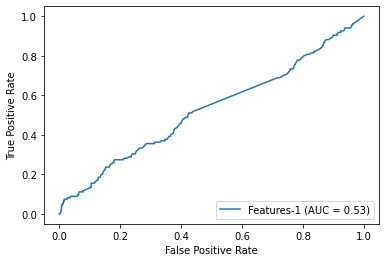

In [12]:
####### Random Forest Classifier ####
import random
from sklearn.ensemble import RandomForestClassifier

# Load train dataset
train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_train.csv"
dataframe_train = read_csv(train_url, header=0)
dataframe_train = dataframe_train[cols]
data_train = dataframe_train.values
X_train, y_train = data_train[:, :-1], data_train[0:, -1]

# Load test dataset
test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/pan_tissue_64_EXP_total_fraction_test.csv"
dataframe_test = read_csv(test_url, header=0)
dataframe_test = dataframe_test[cols]
data_test = dataframe_test.values
X_test, y_test = data_test[:, :-1], data_test[0:, -1]

np.random.seed(786)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)
y_pred1 = clf.predict_proba(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res_f1 = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res_f1)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test, name = curve_name)
clf

In [38]:
# calculate prc
precision, recall, thresholds = precision_recall_curve(y_test, pd.DataFrame(y_pred1)[1])

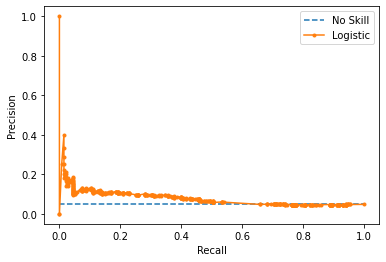

In [39]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [25]:
total_score_df = pd.DataFrame(total_y_pred1, total_test_genes['x'])
print(total_score_df.head())
total_prediction_df =  pd.DataFrame(total_y_pred, total_test_genes['x'])
print(total_prediction_df.head())
total_actual_df = pd.DataFrame(total_y_test, total_test_genes['x'])
print(total_actual_df.head())
total_final_prediction_df = pd.concat([total_score_df, total_prediction_df, total_actual_df], axis = 1, ignore_index = True)

print(total_final_prediction_df.head())

NameError: name 'total_y_pred1' is not defined

In [ ]:
total_actual_value_scores = pd.concat([total_score_df[1], total_actual_df], axis = 1, ignore_index = True)
print(total_actual_value_scores.head())
total_ax = total_actual_value_scores.boxplot(by=1,
                                 fontsize=8,
                                 layout=(2,1),
                                 rot=90,
                                 figsize=(10,20)
                                )

total_ax[0].set_title('Distribution of Random Forest Model Score')
total_ax[0].set_xlabel('COSMIC Cancer Driver Status')
total_ax[0].set_ylabel('Random Forest Model socre')
mannwhitneyu(total_actual_value_scores.loc[total_actual_value_scores[1] == 1][0],
                total_actual_value_scores.loc[total_actual_value_scores[1] == 0][0])

In [30]:
non_cancer_drivers = total_actual_value_scores.loc[total_actual_value_scores[1] !=  1]

In [31]:
total_top_10_highest_scoring = non_cancer_drivers.sort_values(0).tail(round(len(non_cancer_drivers)*.1))
total_top_10_lowest_scoring = non_cancer_drivers.sort_values(0).head(round(len(non_cancer_drivers)*.1))

In [32]:
total_output_df_high = pd.DataFrame({"Gene": total_top_10_highest_scoring.index.values,
                          "GeneType" : ['high']*len(total_top_10_highest_scoring)})
total_output_df_low = pd.DataFrame({"Gene": total_top_10_lowest_scoring.index.values,
                          "GeneType" : ['low']*len(total_top_10_lowest_scoring)})
final_output_df = pd.concat([total_output_df_high, total_output_df_low], axis = 0, ignore_index = True)
final_output_df.to_csv("/data/timonaj/Arash_code/oncoFeats/total_ml_pred.txt", sep='\t', index=False)

#y_pred1
#res = pd.DataFrame(y_pred1)
#res.to_csv("/Users/agrawalp4/Documents/Varun_work/ml/HBEC/up_unchange/gene_rf_pred", sep=',', index=False)

Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.951658
roc_auc on test data : 0.557901


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


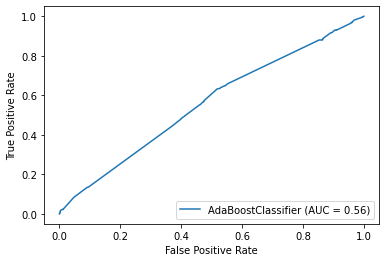

In [26]:
####### AdaBoost Classifier ####
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

clf = AdaBoostClassifier(n_estimators=10)
clf.fit(total_X_train, total_y_train)

# make a prediction
y_pred = clf.predict(total_X_test)
y_pred1 = clf.predict_proba(total_X_test)

# summarize prediction

average_precision = precision_score(total_y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(total_y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(total_y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(total_y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(total_y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, total_X_test, total_y_test)

Average precision score: 0.42
Average recall score: 0.03
f1 on test data : 0.058419
Accuray on test data : 0.959305
roc_auc on test data : 0.759152


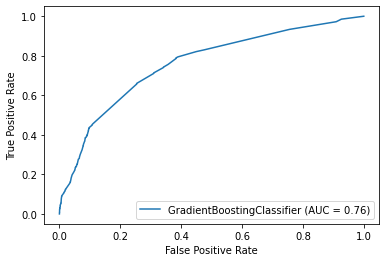

In [15]:
####### Gradient Boosting Classifier ####
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=1, random_state=0)
clf.fit(total_X_train, total_y_train)

# make a prediction
y_pred = clf.predict(X_test)
y_pred1 = clf.predict_proba(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test)

Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.959750
roc_auc on test data : 0.500000


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


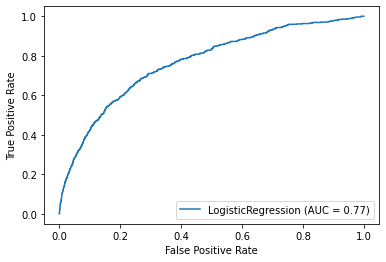

In [16]:
####### Logistic Regression Classifier ####
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

clf = LogisticRegression(penalty='l1', C=1.0, class_weight=None, solver='liblinear')
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred)
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test)

Average precision score: 0.47
Average recall score: 0.03
f1 on test data : 0.058824
Accuray on test data : 0.959602
roc_auc on test data : 0.514948


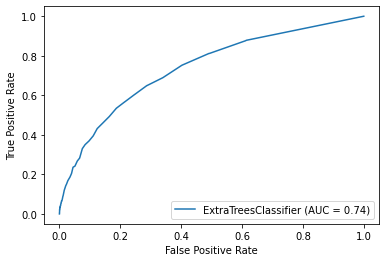

In [17]:
####### ExtraTree Classifier ####
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=2)
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred)
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test)